In [1]:
import pandas as pd
from sklearn.preprocessing import LabelEncoder
import numpy as np
from rdflib import Graph

------------------------------------------------
SENATORI

In [15]:
sen = pd.read_csv("data/composizione_commissioni_data.csv")

In [16]:
le = LabelEncoder().fit(sen['titolo'])
sen['titolo'] = le.transform(sen['titolo'])

In [17]:
id = []
for i in range(sen.shape[0]):
    id.append(sen['senatore'][i][31:])

In [18]:
sen['id'] = id
sen.drop('senatore', axis = 1, inplace= True)
sen

,nome,cognome,inizioAfferenza,carica,commissione,titolo,id
0,Alberto,Balboni,2022-11-10,Presidente,http://dati.senato.it/commissione/0-1,1,17542
1,Marcello,Pera,2022-11-09,Membro,http://dati.senato.it/commissione/0-1,1,3900
2,Daisy,Pirovano,2022-11-09,Membro,http://dati.senato.it/commissione/0-1,1,18562
3,Marco,Meloni,2022-11-09,Membro,http://dati.senato.it/commissione/0-1,1,29490
4,Peppe,De Cristofaro,2022-11-09,Membro,http://dati.senato.it/commissione/0-1,1,22918
...,...,...,...,...,...,...,...
358,Andrea,Crisanti,2023-01-11,Membro,http://dati.senato.it/commissione/4-90,17,36387
359,Marco,Dreosto,2023-01-11,Membro,http://dati.senato.it/commissione/4-90,17,36396
360,Ester,Mieli,2023-01-11,Membro,http://dati.senato.it/commissione/4-90,17,36408
361,Marco,Scurria,2023-01-11,Membro,http://dati.senato.it/commissione/4-90,17,33863


In [19]:
import networkx as nx
from networkx.algorithms import bipartite

In [20]:
G = nx.Graph()
G.add_nodes_from(sen['id'], bipartite  = 0)
G.add_nodes_from(sen['titolo'], bipartite = 1)

In [21]:
a = []
for i in range(sen.shape[0]):
    a.append((sen['id'][i], sen['titolo'][i]))

In [22]:
G.add_edges_from(a)

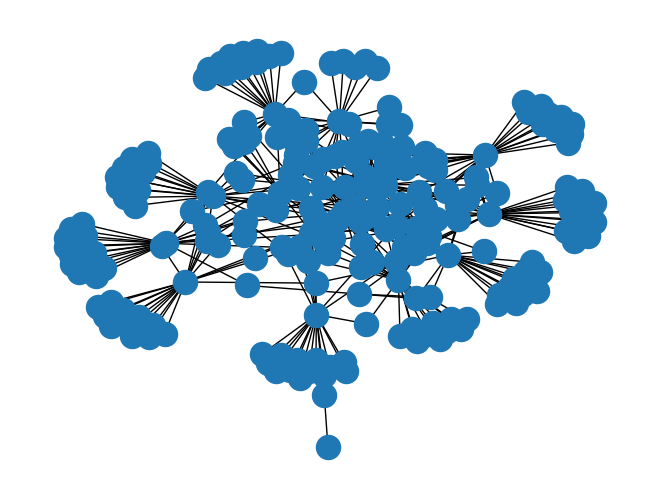

In [23]:
nx.draw(G)

------------------------------------------------------------
DEPUTATI

In [12]:
dep = pd.read_csv('data/incarichi_dep.csv')
for c in ['organo', 'collegio']:
    le = LabelEncoder()
    le.fit(dep[c])
    dep[c] = le.transform(dep[c])

In [ ]:
a = []
for i in range(dep.shape[0]):
    a.append(dep['d'][i][39:])

dep['id'] = a
dep.drop('d', inplace= True, axis = 1)

In [32]:
G = nx.Graph()
G.add_nodes_from(dep['id'], bipartite  = 0)
G.add_nodes_from(dep['collegio'], bipartite = 1)

In [38]:
a = []
for i in range(dep.shape[0]):
    a.append((dep['id'][i], dep['collegio'][i]))

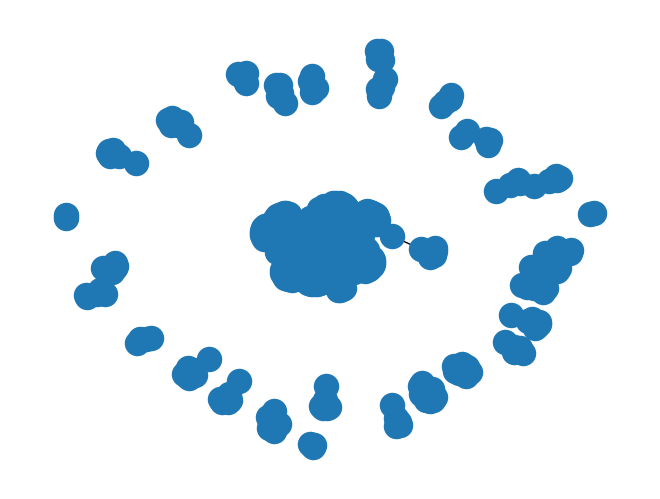

In [40]:
G.add_edges_from(a)
nx.draw(G)